## Introduction
### Create a machine learning model to predict whether an individual earns above 50,000 in a specific currency or not.

### Import the necessary packages.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # visualization
from matplotlib import pyplot as plt # visualization
%matplotlib inline 
import warnings
warnings.filterwarnings("ignore")
import re
#import klib

from scipy.stats import skew, kurtosis
from prettytable import PrettyTable
import matplotlib.ticker as mtick

### Import train and test dataset

In [2]:
train=pd.read_csv("../input/zindi-income-prediction-challenge-by-umojahack/Train.csv")
test=pd.read_csv("../input/zindi-income-prediction-challenge-by-umojahack/Test.csv")
feat_info=pd.read_csv("../input/zindi-income-prediction-challenge-by-umojahack/VariableDefinitions.csv")

### Structure of the train and test dataset

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209499 entries, 0 to 209498
Data columns (total 43 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   ID                              209499 non-null  object 
 1   age                             209499 non-null  int64  
 2   gender                          209499 non-null  object 
 3   education                       209499 non-null  object 
 4   class                           104254 non-null  object 
 5   education_institute             13302 non-null   object 
 6   marital_status                  209499 non-null  object 
 7   race                            209499 non-null  object 
 8   is_hispanic                     209499 non-null  object 
 9   employment_commitment           209499 non-null  object 
 10  unemployment_reason             6520 non-null    object 
 11  employment_stat                 209499 non-null  int64  
 12  wage_per_hour   

#### The above information shows that there are 209499 data entries and 42 columns.

In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89786 entries, 0 to 89785
Data columns (total 42 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              89786 non-null  object 
 1   age                             89786 non-null  int64  
 2   gender                          89786 non-null  object 
 3   education                       89786 non-null  object 
 4   class                           44707 non-null  object 
 5   education_institute             5616 non-null   object 
 6   marital_status                  89786 non-null  object 
 7   race                            89786 non-null  object 
 8   is_hispanic                     89786 non-null  object 
 9   employment_commitment           89786 non-null  object 
 10  unemployment_reason             2680 non-null   object 
 11  employment_stat                 89786 non-null  int64  
 12  wage_per_hour                   

#### The above information shows that there are 89786 data entries and 41 columns.

### Let's see is there any missing values in train and test dataset by column wise.

In [5]:
train.isnull().sum()

ID                                     0
age                                    0
gender                                 0
education                              0
class                             105245
education_institute               196197
marital_status                         0
race                                   0
is_hispanic                            0
employment_commitment                  0
unemployment_reason               202979
employment_stat                        0
wage_per_hour                          0
is_labor_union                    189420
working_week_per_year                  0
industry_code                          0
industry_code_main                     0
occupation_code                        0
occupation_code_main              105694
total_employed                         0
household_stat                         0
household_summary                      0
under_18_family                   151654
veterans_admin_questionnaire      207415
vet_benefit     

In [6]:
train.columns[train.isnull().any()]

Index(['class', 'education_institute', 'unemployment_reason', 'is_labor_union',
       'occupation_code_main', 'under_18_family',
       'veterans_admin_questionnaire', 'migration_code_change_in_msa',
       'migration_prev_sunbelt', 'migration_code_move_within_reg',
       'migration_code_change_in_reg', 'residence_1_year_ago',
       'old_residence_reg', 'old_residence_state'],
      dtype='object')

#### There are missing values in the columns class, education_institute, unemployment_reason, is_labor_union, occupation_code_main, under_18_family, veterans_admin_questionnaire, migration_code_change_in_msa, migration_prev_sunbelt, migration_code_move_within_reg, migration_code_change_in_reg, residence_1_year_ago, old_residence_reg, old_residence_state.

In [7]:
test.isnull().sum()

ID                                    0
age                                   0
gender                                0
education                             0
class                             45079
education_institute               84170
marital_status                        0
race                                  0
is_hispanic                           0
employment_commitment                 0
unemployment_reason               87106
employment_stat                       0
wage_per_hour                         0
is_labor_union                    81322
working_week_per_year                 0
industry_code                         0
industry_code_main                    0
occupation_code                       0
occupation_code_main              45273
total_employed                        0
household_stat                        0
household_summary                     0
under_18_family                   64972
veterans_admin_questionnaire      88859
vet_benefit                           0


In [8]:
test.columns[test.isnull().any()]

Index(['class', 'education_institute', 'unemployment_reason', 'is_labor_union',
       'occupation_code_main', 'under_18_family',
       'veterans_admin_questionnaire', 'migration_code_change_in_msa',
       'migration_prev_sunbelt', 'migration_code_move_within_reg',
       'migration_code_change_in_reg', 'residence_1_year_ago',
       'old_residence_reg', 'old_residence_state'],
      dtype='object')

#### There are missing values in the columns class, education_institute, unemployment_reason, is_labor_union, occupation_code_main, under_18_family, veterans_admin_questionnaire, migration_code_change_in_msa, migration_prev_sunbelt, migration_code_move_within_reg, migration_code_change_in_reg, residence_1_year_ago, old_residence_reg, old_residence_state.

In [9]:
def count_plot(df,col,rot=None,switchax=None,size=(8,6),title=''):
    _=plt.figure(figsize=size)
    if switchax:
        _=sns.countplot(y=df[col],order=df[col].value_counts().index);
        _=plt.title(title,fontsize=25)
        _=plt.ylabel(col,fontsize=20)
        _=plt.yticks(fontsize=14,rotation=rot)   

    else:
        _=sns.countplot(x=df[col],order=df[col].value_counts().index);
        _=plt.title(title,fontsize=25)
        _=plt.xlabel(col,fontsize=20)
        _=plt.xticks(fontsize=14,rotation=rot)   

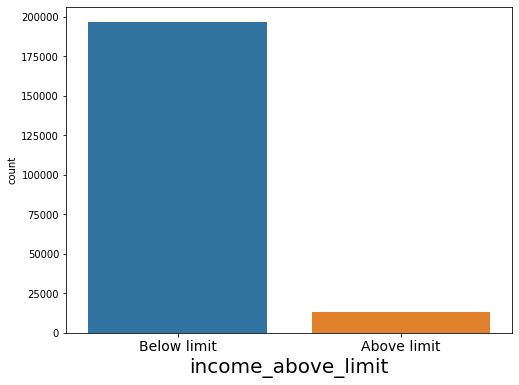

In [10]:
count_plot(train,'income_above_limit')

In [11]:
train['income_above_limit'].value_counts()

Below limit    196501
Above limit     12998
Name: income_above_limit, dtype: int64

#### The above plot explain that there is a imbalance between the classes.

### Let's see the missing value percentage by column-wise.

In [12]:
def missing_value_info(df):
    null_info_df=pd.DataFrame({'column':df.isnull().sum().index,'count':df.isnull().sum().values}).query('count > 0').\
    assign(missing_percentage=lambda x: round((x['count']/len(df))*100,3 )).sort_values('missing_percentage',ascending=False)
    _=plt.figure(figsize=(15,6));
    df_plot=sns.barplot(data=null_info_df,x='missing_percentage',y='column',color='green')
    _=plt.yticks(fontsize=15);
    _=plt.xticks(fontsize=15);
    _=plt.title("Missing Value Percentage by Column \n",fontsize=20)
    df_plot.xaxis.set_major_formatter(mtick.PercentFormatter())
    return  print(f"Columns with More than 70% of Missing Data: {null_info_df[null_info_df['missing_percentage']>70]['column'].values}\n\n"),display(null_info_df)

Columns with More than 70% of Missing Data: ['veterans_admin_questionnaire' 'unemployment_reason'
 'education_institute' 'old_residence_reg' 'old_residence_state'
 'is_labor_union' 'under_18_family']




,column,count,missing_percentage
23,veterans_admin_questionnaire,207415,99.005
10,unemployment_reason,202979,96.888
5,education_institute,196197,93.651
39,old_residence_reg,193148,92.195
40,old_residence_state,193148,92.195
13,is_labor_union,189420,90.416
22,under_18_family,151654,72.389
38,residence_1_year_ago,106284,50.732
18,occupation_code_main,105694,50.451
4,class,105245,50.237


(None, None)

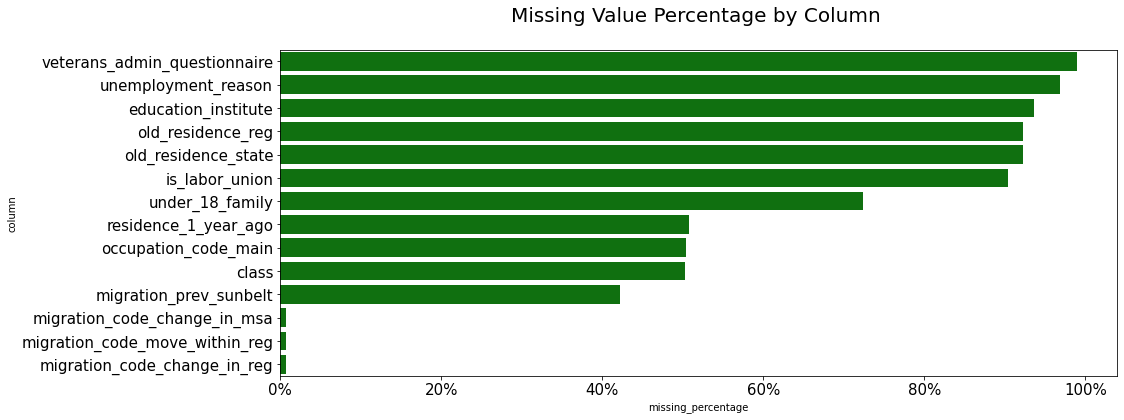

In [13]:
missing_value_info(train)

### The above plot explains that the columns veterans_admin_questionnaire, unemployment_reason, education_institute, old_residence_reg, old_residence_state, is_labor_union,under_18_family have more than 70% of missing values.


### Let's see the number of categorical columns in the data and its count.

In [14]:
for i,col  in enumerate(list(train.select_dtypes(include='object').columns.values)[1:]):    
    print("="*100)
    print(f"{col} number of unique values: {train[col].nunique()}")
    print(f"{train[col].value_counts()}")
    print("="*100)

gender number of unique values: 2
 Female    108784
 Male      100715
Name: gender, dtype: int64
education number of unique values: 17
 High school graduate                      50627
 Children                                  49685
 Some college but no degree                29320
 Bachelors degree(BA AB BS)                20979
 7th and 8th grade                          8438
 10th grade                                 7905
 11th grade                                 7260
 Masters degree(MA MS MEng MEd MSW MBA)     6861
 9th grade                                  6540
 Associates degree-occup /vocational        5650
 Associates degree-academic program         4494
 5th or 6th grade                           3542
 12th grade no diploma                      2282
 1st 2nd 3rd or 4th grade                   1917
 Prof school degree (MD DDS DVM LLB JD)     1852
 Doctorate degree(PhD EdD)                  1318
 Less than 1st grade                         829
Name: education, dtype: int64
cl

#### The above summary explains the categorical level needs proper data cleaning.

### Let's see the target wise numerical columns distribution by using boxplot.

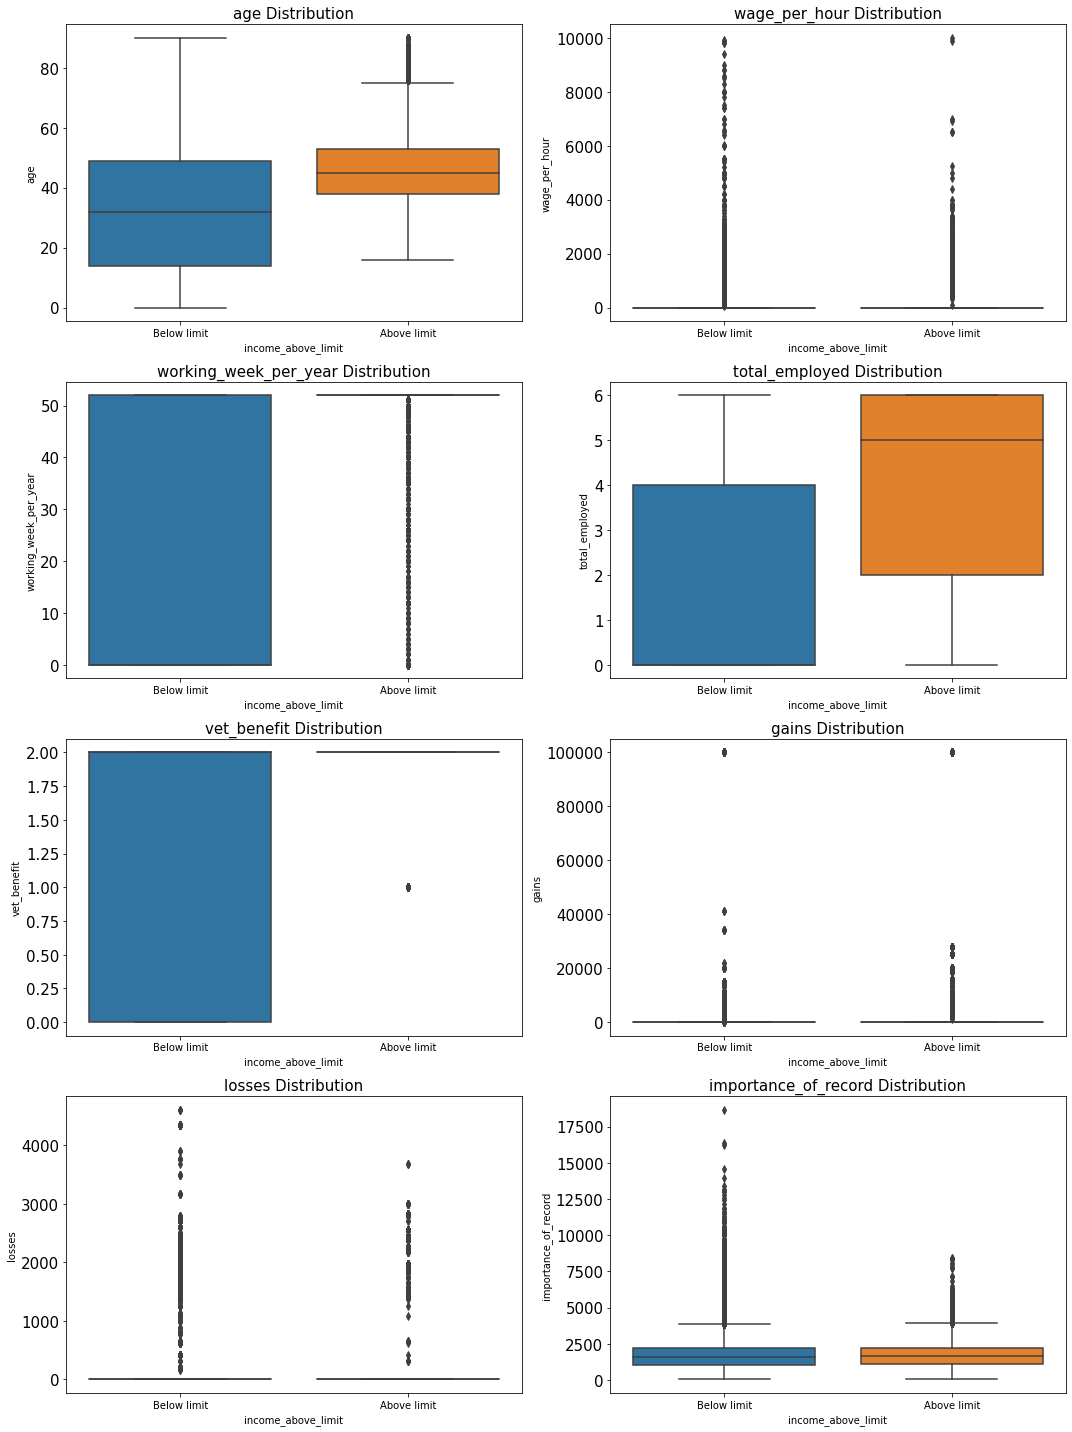

In [15]:
fig=plt.subplots(figsize=(15, 20))
for i,col  in enumerate( ['age',  'wage_per_hour', 'working_week_per_year',
        'total_employed', 'vet_benefit',
       'gains', 'losses',  'importance_of_record']):
    _=plt.subplot(4,2,i+1)
    _=sns.boxplot(x=train['income_above_limit'],y=train[col])
    _=plt.title(col+' Distribution',fontsize=15)
    _=plt.ylabel(col,fontsize=10)
    _=plt.yticks(fontsize=15)
    _=plt.tight_layout()  
plt.show()  
    

In [16]:
box_plot_summary = PrettyTable([i.capitalize() for i in['name', 'min', 'Q1-25%', 'Q2(Median)50%', 'Q3-75%', 'max','iqr','lower limit','upper limit','outlier']])
box_plot_summary.align["Name"] = "l"

for num, col  in enumerate(['age',  'wage_per_hour', 'working_week_per_year',
        'total_employed', 'vet_benefit',
       'gains', 'losses',  'importance_of_record']):
    d=list()
    d.append(f"{num+1}.{col.capitalize()}")
    d.append(round(train[col].describe()[3],3))
    d.append(round(train[col].describe()[4],3))
    d.append(round(train[col].describe()[5],3))
    d.append(round(train[col].describe()[6],3))
    d.append(round(train[col].describe()[7],3))
    d.append(round(train[col].describe()[6]-train[col].describe()[4],3))
    low_limit=round(train[col].describe()[4]-1.5*(train[col].describe()[6]-train[col].describe()[4]),3)
    up_limit=round(train[col].describe()[6]+1.5*(train[col].describe()[6]-train[col].describe()[4]),3)
    d.append(low_limit)
    d.append(low_limit)
    d.append(any([(any(i < low_limit for i in train[col].values)), (any(i > up_limit for i in train[col].values))]))
    
    box_plot_summary.add_row(d)
box_plot_summary

Name,Min,Q1-25%,Q2(median)50%,Q3-75%,Max,Iqr,Lower limit,Upper limit,Outlier
1.Age,0.0,15.0,33.0,50.0,90.0,35.0,-37.5,-37.5,False
2.Wage_per_hour,0.0,0.0,0.0,0.0,9999.0,0.0,0.0,0.0,True
3.Working_week_per_year,0.0,0.0,8.0,52.0,52.0,52.0,-78.0,-78.0,False
4.Total_employed,0.0,0.0,1.0,4.0,6.0,4.0,-6.0,-6.0,False
5.Vet_benefit,0.0,2.0,2.0,2.0,2.0,0.0,2.0,2.0,True
6.Gains,0.0,0.0,0.0,0.0,99999.0,0.0,0.0,0.0,True
7.Losses,0.0,0.0,0.0,0.0,4608.0,0.0,0.0,0.0,True
8.Importance_of_record,37.87,1061.29,1617.04,2185.48,18656.3,1124.19,-624.995,-624.995,True


#### The box plot and summary explain that there are outliers(based on the fence statistics) in the columns wage_per_hour, vet_benefit, gains, losses, and importance of record.

### Let's see the target wise numerical columns distribution by using kernel density plot.

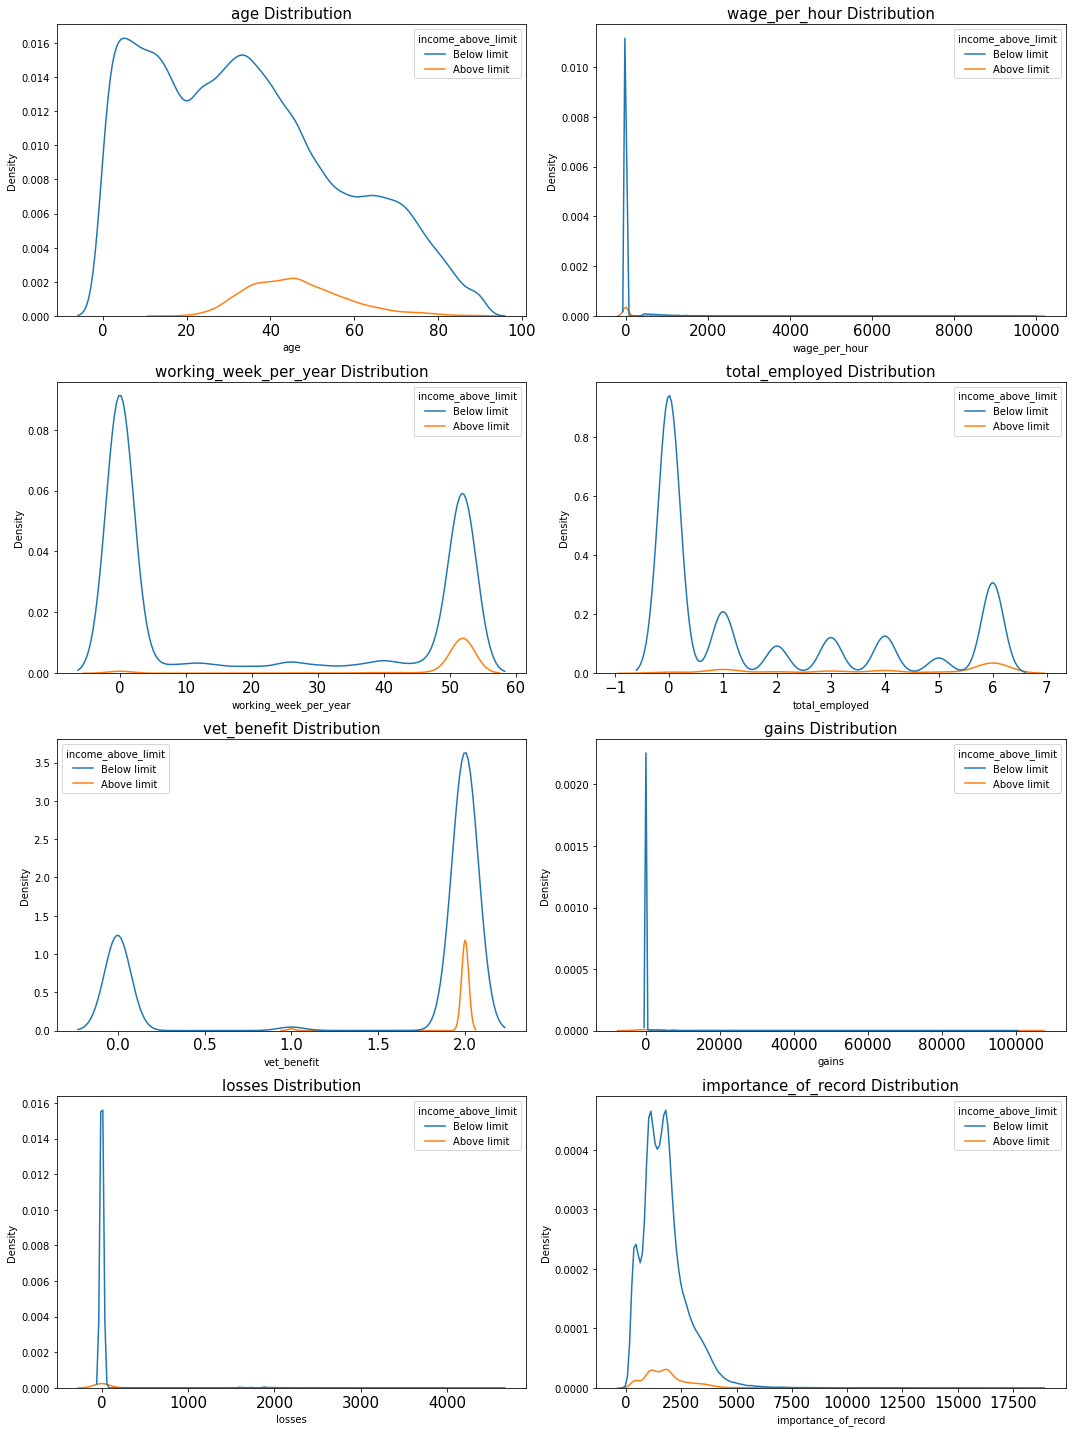

In [17]:
fig=plt.subplots(figsize=(15, 20))
for i,col  in enumerate( ['age',  'wage_per_hour', 'working_week_per_year',
        'total_employed', 'vet_benefit',
       'gains', 'losses',  'importance_of_record']):
    _=plt.subplot(4,2,i+1)
    _=sns.kdeplot(x=train[col],hue=train['income_above_limit'])
    _=plt.title(col+' Distribution',fontsize=15)
    _=plt.xlabel(col,fontsize=10)
    _=plt.xticks(fontsize=15)
    _=plt.tight_layout()  
plt.show()  

In [18]:
kde_plot_summary = PrettyTable([i.capitalize() for i in['name','skew','kurtosis','mean','median','mean>median']])
kde_plot_summary.align['Name']="l"
for field in ['skew','kurtosis','mean','median']:
    kde_plot_summary.align[field]="r"
    


for num, col  in enumerate(['age',  'wage_per_hour', 'working_week_per_year',
        'total_employed', 'vet_benefit',
       'gains', 'losses',  'importance_of_record']):
    d=list()
    d.append(f"{num+1}.{col.capitalize()}")

    d.append(round(skew(train[col], axis=0, bias=True),3))
    d.append(round(kurtosis(train[col], axis=0, bias=True),3))
    d.append(round(train[col].describe()[1],3))
    d.append(round(train[col].describe()[6],3))
    d.append(train[col].describe()[1]>train[col].describe()[6])
    kde_plot_summary.add_row(d)

kde_plot_summary

Name,Skew,Kurtosis,Mean,Median,Mean>median
1.Age,0.371,-0.736,34.519,50.0,False
2.Wage_per_hour,9.222,166.169,55.433,0.0,True
3.Working_week_per_year,0.212,-1.862,23.159,52.0,False
4.Total_employed,0.753,-1.079,1.956,4.0,False
5.Vet_benefit,-1.204,-0.531,1.516,2.0,False
6.Gains,18.982,392.946,435.927,0.0,True
7.Losses,7.7,62.966,36.882,0.0,True
8.Importance_of_record,1.465,5.853,1740.888,2185.48,False


#### The kernel density plot and summary explains that the columns wage_per_hour, gains, losses are positive skewed(mean>median).Other columns are negatively skewed.